In [34]:
from IPython.core.display import HTML,SVG


In [30]:
svg_arrows = ''

def add_arrow(string,name='arrow',scale=1,angle=0,center_x=0,center_y=0,color="#337ab7"):
    trans_x = center_x*(1-scale)
    trans_y = center_y*(1-scale)
    
   
    string += f'<path d="M {center_x},{center_y} h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z" ' 
    string += f'fill="#337ab7" id="arrow_1" class="tooltip-trigger" data-tooltip-text="{name}" '
    string += f'data_v="v = {scale:2.1f} V" data_i="i = {angle:2.1f} A" '
    string += f'stroke-width="0" transform="translate({trans_x},{trans_y}) scale({scale})  rotate({angle},{center_x},{center_y})" '   
    string += f'/>' 
    return string


svg_arrows = add_arrow(svg_arrows,name='arrow_1\n v',scale=2,angle=0, center_x=200,center_y=200,color="#337ab7") 
svg_arrows = add_arrow(svg_arrows,name='arrow_2',scale=2,angle=90,center_x=200,center_y=200,color="#337ab7")       
svg_arrows = add_arrow(svg_arrows,name='arrow_3',scale=1.5,angle=180,center_x=200,center_y=200,color="#337ab7")  

print(svg_arrows)

<path d="M 200,200 h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z" fill="#337ab7" id="arrow_1" class="tooltip-trigger" data-tooltip-text="arrow_1
 v" data_v="v = 2.0 V" data_i="i = 0.0 A" stroke-width="0" transform="translate(-200,-200) scale(2)  rotate(0,200,200)" /><path d="M 200,200 h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z" fill="#337ab7" id="arrow_1" class="tooltip-trigger" data-tooltip-text="arrow_2" data_v="v = 2.0 V" data_i="i = 90.0 A" stroke-width="0" transform="translate(-200,-200) scale(2)  rotate(90,200,200)" /><path d="M 200,200 h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z" fill="#337ab7" id="arrow_1" class="tooltip-trigger" data-tooltip-text="arrow_3" data_v="v = 1.5 V" data_i="i = 180.0 A" stroke-width="0" transform="translate(-100.0,-100.0) scale(1.5)  rotate(180,200,200)" />


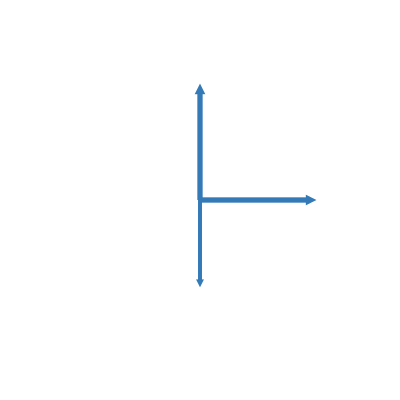

In [38]:
SVG('''
<svg xmlns="http://www.w3.org/2000/svg" 
height="400"  width="400"
id="tooltip-svg-5">
	<style>
		#tooltip {
			dominant-baseline: hanging; 
		}
	</style>

{arrows}    <g id="tooltip" visibility="hidden" >
		<rect x="2" y="2" width="80" height="55" fill="black" opacity="0.4" rx="2" ry="2"/>
		<rect width="80" height="54" fill="white" rx="2" ry="2"/>
		<text x="3" y="6">Tooltip
        <tspan dy="1.2em" x="4" fill="red">line1</tspan>
        <tspan dy="1.2em" x="4" fill="red">line2</tspan>
        </text>
	</g>


	<script type="text/ecmascript"><![CDATA[
		(function() {
			var svg = document.getElementById('tooltip-svg-5');
			var tooltip = svg.getElementById('tooltip');
			var tooltipText = tooltip.getElementsByTagName('text')[0].firstChild;
            var tooltipTspan_1 = tooltip.getElementsByTagName('text')[0].getElementsByTagName('tspan')[0].firstChild;
            var tooltipTspan_2 = tooltip.getElementsByTagName('text')[0].getElementsByTagName('tspan')[1].firstChild;
			var triggers = svg.getElementsByClassName('tooltip-trigger');

			for (var i = 0; i < triggers.length; i++) {
				triggers[i].addEventListener('mousemove', showTooltip);
				triggers[i].addEventListener('mouseout', hideTooltip);
			}

			function showTooltip(evt) {
				var CTM = svg.getScreenCTM();
				var x = (evt.clientX - CTM.e + 6) / CTM.a;
				var y = (evt.clientY - CTM.f + 20) / CTM.d;
				tooltip.setAttributeNS(null, "transform", "translate(" + x + " " + y + ")");
				tooltip.setAttributeNS(null, "visibility", "visible");
				tooltipText.data = evt.target.getAttributeNS(null, "data-tooltip-text");
                tooltipTspan_1.data = evt.target.getAttributeNS(null, "data_v");
                tooltipTspan_2.data = evt.target.getAttributeNS(null, "data_i");
			}

			function hideTooltip(evt) {
				tooltip.setAttributeNS(null, "visibility", "hidden");
			}
		})()
    ]]></script>
</svg>
'''.replace('{arrows}',svg_arrows))

In [39]:
var tooltipTspan_2 = tooltip.getElementsByTagName('text')[0].getElementsByTagName('tspan')[0].lastChild;

SyntaxError: invalid syntax (<ipython-input-39-33b1a0bd61ec>, line 1)

In [9]:
dwg = svgwrite.Drawing('arrows.svg', (400, 400))

def add_arrow(dwg,name='arrow',scale=1,angle=0,center_x=0,center_y=0,color="#337ab7"):
    trans_x = center_x*(1-scale)
    trans_y = center_y*(1-scale)
    transform = f"translate({trans_x},{trans_y}) scale({scale})  rotate({angle},{center_x},{center_y})"
    line = dwg.add(dwg.path(d="M 200,200 h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z",
                        id=name,
                        transform=transform,fill=color, stroke="black", stroke_width="0",
                        onmouseover="showMyTooltip(evt)"))
    
    return line


add_arrow(dwg,name='arrow_1',scale=0.5,angle=10,center_x=200,center_y=200)
dwg.tostring()

'<svg baseProfile="full" height="400" version="1.1" width="400" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><path d="M 200,200 h 1.32292 v -52.916665 h 1.32291 l -2.64583,-5.291666 -2.64583,5.291666 h 1.32291 v 52.916665 z" fill="#337ab7" id="arrow_1" onmouseover="showMyTooltip(evt)" stroke="black" stroke-width="0" transform="translate(100.0,100.0) scale(0.5)  rotate(10,200,200)" /></svg>'